<a href="https://colab.research.google.com/github/Sourav-Manik/AI_Deep_Learning/blob/main/BERT_implementation_using_Simple_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BERT_implementation_using_Simple_Transformers

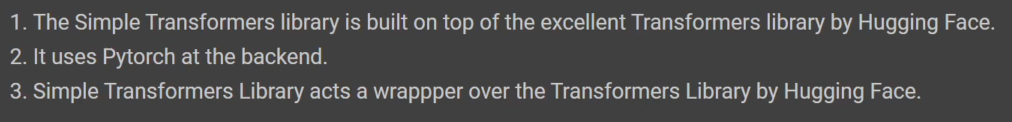

In [ ]:
!pip install simpletransformers

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
data = pd.read_csv('/content/movie.csv')
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [ ]:
data['text'].value_counts()

I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.                                                                                                                              

In [ ]:
#Independent ans dependent variable
x = data["text"]
y = data["label"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs

In [ ]:
model_args = ClassificationArgs()
model_args.num_train_epochs = 2
model_args.learning_rate = 1e-4

Default values of "args" parameters

In [ ]:
#self.args=  

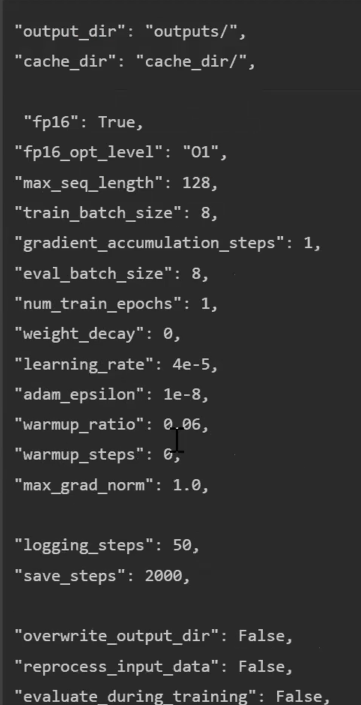

## Model Initialization

In [ ]:
model = ClassificationModel("bert","bert-base-cased",num_labels = 2, args = model_args,use_cuda=False)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

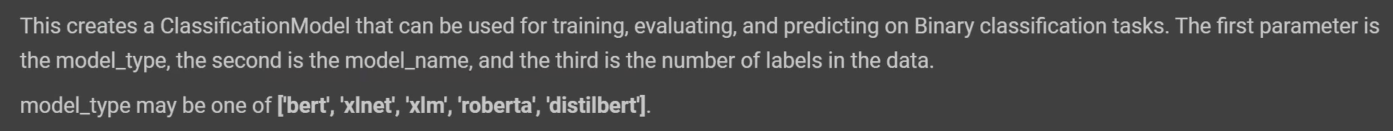

## Train and Evaluation dataset preparation

In [ ]:
train_df = pd.DataFrame({"text":x_train,"label":y_train})
eval_df = pd.DataFrame({"text":x_test,"label":y_test})

In [ ]:
train_df.head()

,text,label
184,Version: Universal / Hong Kong Legends R4 DVD ...,1
248,There's a part of me that would like to give t...,0
244,What a crazy film!It lasts 12(!) hours and you...,1
67,Airport '77 starts as a brand new luxury 747 p...,0
188,Red Rock West is one of those tight noir thril...,1


## Training of Model

In [ ]:
model.train_model(train_df, acc = accuracy_score)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:613: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/400 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/50 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/50 [00:00<?, ?it/s]

(100, 0.5919360347092152)

## Evaluation of Model

In [ ]:
model.eval_model(eval_df, acc = accuracy_score)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1455: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/100 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/13 [00:00<?, ?it/s]

({'mcc': 0.560448538317805,
  'tp': 40,
  'tn': 38,
  'fp': 12,
  'fn': 10,
  'auroc': 0.8592,
  'auprc': 0.8794448728368582,
  'acc': 0.78,
  'eval_loss': 0.5042728896324451},
 array([[-1.94011247,  0.89436185],
        [-1.85972023,  0.92517555],
        [ 0.5697549 , -1.52440023],
        [-0.63148254, -0.64381802],
        [ 0.880373  , -1.79182291],
        [-1.56618929,  0.31966874],
        [-1.05822957, -0.13896704],
        [ 0.84136224, -1.87953138],
        [-1.53086793,  0.50823724],
        [-1.8784287 ,  0.7412684 ],
        [ 0.85618246, -1.81318235],
        [-0.45298761, -0.90787506],
        [-2.00737238,  1.16170716],
        [-0.21013451, -1.09276867],
        [-1.82684898,  0.86001039],
        [-1.73294997,  0.82500076],
        [-1.88121581,  0.93584716],
        [ 0.45778477, -1.56111443],
        [ 0.7812072 , -1.78924584],
        [-1.8136214 ,  0.66154689],
        [-1.51908553,  0.28611457],
        [ 0.76317847, -1.72819018],
        [-1.86974573,  0.844373

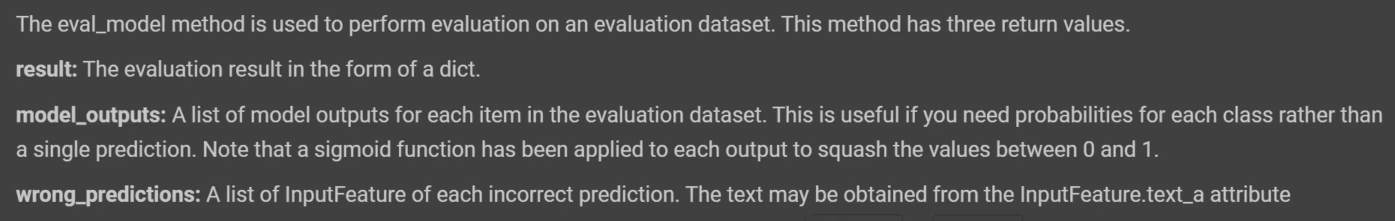

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df, acc = accuracy_score )

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1455: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/100 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/13 [00:00<?, ?it/s]

In [ ]:
result

{'mcc': 0.560448538317805,
 'tp': 40,
 'tn': 38,
 'fp': 12,
 'fn': 10,
 'auroc': 0.8592,
 'auprc': 0.8794448728368582,
 'acc': 0.78,
 'eval_loss': 0.5042728896324451}

In [ ]:
model.predict(["We aren't performing well!!"])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

(array([0]), array([[ 0.30934089, -1.35375333]]))

In [ ]:
model.predict(["We are performing well!!"])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

(array([1]), array([[-2.00114894,  0.88110024]]))

In [ ]:
#END